In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

A = [0, 1/4, 3/8, 12/13, 1, 1/2]

B = np.asarray([[],
     [1/4],
     [3/32, 9/32],
     [1932/2197, -7200/2197, 7296/2197],
     [439/216, -8, 3680/513, -845/4104],
     [-8/27, 2, -3544/2565, 1859/4104, -11/40]])
C = [25/216, 0, 1408/2565, 2197/4104, -1/5, 0]
CH = [16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55]
CT = [1/360, 0, -128/4275, -2197/75240, 1/50, 2/55]

def fun(t, y):
    if (np.any(np.isinf(y))):
         return y
    res = y**2 + 2
    return res

h = 0.5
k = [1]
t0 = 0
y0 = np.linspace(0,2,9).reshape(3,3)
k = []


_loop_total = 0
def RK45(fun, t0, y0, h, max_depth=100, curr_depth=1):
    """
    Returns the new stepsize and value
    Input:
    fun: function
    y0: current value
    """
    global _loop_total
    _loop_total += 1
    
    k1 = h * fun(t0 + A[0]*h, y0)
    k2 = h * fun(t0 + A[1]*h, y0 + B[1]*k1)
    k3 = h * fun(t0 + A[2]*h, y0 + B[2][0]*k1 + B[2][1]*k2)
    k4 = h * fun(t0 + A[3]*h, y0 + B[3][0]*k1 + B[3][1]*k2 + B[3][2]*k3)
    k5 = h * fun(t0 + A[4]*h, y0 + B[4][0]*k1 + B[4][1]*k2 + B[4][2]*k3 +B[4][3]*k4)
    k6 = h * fun(t0 + A[5]*h, y0 + B[5][0]*k1 + B[5][1]*k2 + B[5][2]*k3 +B[5][3]*k4
                 + B[5][4]*k5)
    k = np.asarray([k1,k2,k3,k4,k5,k6])
    y1 = y0 + sum([CH[i]*k[i] for i in range(6)])
    TE = np.abs(sum([CT[i]*k[i] for i in range(6)])).max()
    
    fac = 0.9
    min_step = 1e-6
    max_step = 5e-1
    tol = 1e-3
    
    print(_loop_total, curr_depth, max_depth, TE, type(TE), np.isnan(TE))
    
    h_new = min(max_step, max(min_step, h * fac * (tol/TE)**0.2))
    
    if (np.isnan(TE) or TE <= tol or curr_depth+1 >= max_depth):
        return y1, h_new
    print("Not precise enough")
    return RK45(fun, t0, y0, h_new, max_depth=max_depth, curr_depth=curr_depth+1)


h = 0.001
steps = 100 # NEED TO BE DIVISIBLE BY chunk_size FOR NOW
t = np.zeros(steps)

_loop_total = 0
chunk_size = 100
total_chunk = int(np.ceil(steps/chunk_size))

print("steps=", steps, "total_chunk=", total_chunk, "chunk_size=",chunk_size)
for i in range(total_chunk):
    for k in range(chunk_size):
        [y0,h] = RK45(fun, t0, y0, h, max_depth=100)
        t[i*k] = h

    

C:\Users\Hafiz\AppData\Local\Temp\ipykernel_27088\1965728021.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  B = np.asarray([[],


steps= 100 total_chunk= 1 chunk_size= 100
1 1 100 7.287735952904439e-16 <class 'numpy.float64'> False
2 1 100 0.000920783751775206 <class 'numpy.float64'> False
3 1 100 61.24992165466467 <class 'numpy.float64'> False
Not precise enough
4 2 100 1.1543384175194404e-06 <class 'numpy.float64'> False
5 1 100 0.0014226970669099226 <class 'numpy.float64'> False
Not precise enough
6 2 100 0.0006163663660671559 <class 'numpy.float64'> False
7 1 100 0.002516951457911809 <class 'numpy.float64'> False
Not precise enough
8 2 100 0.0022355626438031184 <class 'numpy.float64'> False
Not precise enough
9 3 100 0.000615768000424427 <class 'numpy.float64'> False
10 1 100 0.005660644199919074 <class 'numpy.float64'> False
Not precise enough
11 2 100 0.0007353426220130799 <class 'numpy.float64'> False
12 1 100 0.005716380145576516 <class 'numpy.float64'> False
Not precise enough
13 2 100 0.0006219055872151436 <class 'numpy.float64'> False
14 1 100 0.004590953270985576 <class 'numpy.float64'> False
Not prec

C:\Users\Hafiz\AppData\Local\Temp\ipykernel_27088\1965728021.py:20: RuntimeWarning: overflow encountered in square
  res = y**2 + 2
C:\Users\Hafiz\AppData\Local\Temp\ipykernel_27088\1965728021.py:50: RuntimeWarning: invalid value encountered in add
  TE = np.abs(sum([CT[i]*k[i] for i in range(6)])).max()
C:\Users\Hafiz\AppData\Local\Temp\ipykernel_27088\1965728021.py:44: RuntimeWarning: invalid value encountered in add
  k4 = h * fun(t0 + A[3]*h, y0 + B[3][0]*k1 + B[3][1]*k2 + B[3][2]*k3)
C:\Users\Hafiz\AppData\Local\Temp\ipykernel_27088\1965728021.py:45: RuntimeWarning: invalid value encountered in add
  k5 = h * fun(t0 + A[4]*h, y0 + B[4][0]*k1 + B[4][1]*k2 + B[4][2]*k3 +B[4][3]*k4)
C:\Users\Hafiz\AppData\Local\Temp\ipykernel_27088\1965728021.py:46: RuntimeWarning: invalid value encountered in add
  k6 = h * fun(t0 + A[5]*h, y0 + B[5][0]*k1 + B[5][1]*k2 + B[5][2]*k3 +B[5][3]*k4
C:\Users\Hafiz\AppData\Local\Temp\ipykernel_27088\1965728021.py:49: RuntimeWarning: invalid value encounter

[1.e-06 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]


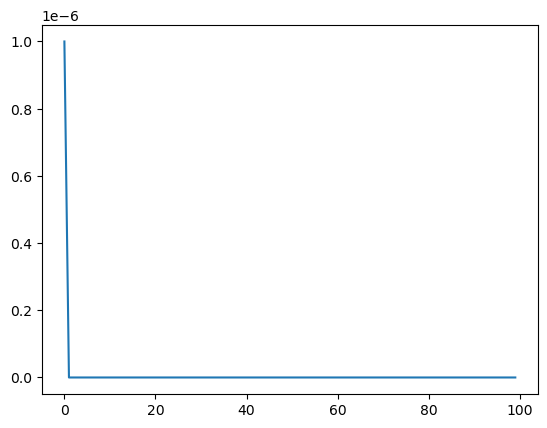

In [2]:
print(t)
plt.plot(t)